In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = tts(X, y , test_size=0.2, random_state=2)

In [19]:
clf = LogisticRegression(solver = 'lbfgs', penalty='l2', C=0.01)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [20]:
X_train.shape

(120, 2)

In [21]:
y_pred = clf.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.9

In [23]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0,  5,  3],
       [ 0,  0,  8]])

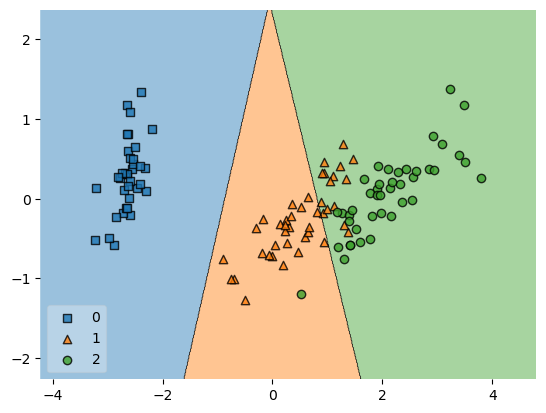

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf, legend=3)
plt.show()